## Loading Data

In [41]:
import pandas as pd
import datetime
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
filename = "./../data/311_Cases.csv"

In [3]:
data = pd.read_csv(filename, encoding='utf8',engine='python').dropna()

In [6]:
# quick inspection
len(data) # 3,362,678
data.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
24810,3135216,12/05/2013 02:50:24 PM,06/25/2018 09:50:55 AM,06/25/2018 09:50:55 AM,Closed,Found 40 square feet of damaged/uneven sidewal...,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,Collapsed_sidewalk,"920 VAN NESS AVE, SAN FRANCISCO, CA, 94109",6.0,Tenderloin,NORTHERN,37.78418,-122.4208,"(37.78416124, -122.42081673)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...
86201,4203877,11/12/2014 08:46:11 PM,06/25/2018 10:38:19 AM,06/25/2018 10:38:19 AM,Closed,9 Sumner St: damaged sidewalk around utility v...,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,Collapsed_sidewalk,"10 SUMNER ST, SAN FRANCISCO, CA, 94103",6.0,South of Market,SOUTHERN,37.77632,-122.4106,"(37.77629119, -122.41061191)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...
86582,4223752,11/19/2014 10:48:56 AM,06/25/2018 10:22:00 AM,06/25/2018 10:22:00 AM,Closed,2515-2565 Bay Shore Blvd: damaged sidewalk nex...,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,Collapsed_sidewalk,Intersection of BAY SHORE BLVD and SUNNYDALE AVE,10.0,Little Hollywood,INGLESIDE,37.70903,-122.4048,"(37.70885355, -122.4051094)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...
100891,10303151,01/01/2019 10:10:00 PM,01/08/2019 05:46:00 AM,01/08/2019 05:46:00 AM,Closed,01/07/2019 VEH GOA @1033 HOURS #338,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicles,DPT Abandoned Vehicles Low,"1097 OAKDALE AVE, SAN FRANCISCO, CA, 94124",10.0,Hunters Point,BAYVIEW,37.72940,-122.3813,"(37.72939344, -122.38131978)",Web,http://mobile311.sfgov.org/media/san_francisco...
140933,10303744,01/02/2019 08:20:00 AM,01/08/2019 07:39:00 AM,01/08/2019 07:39:00 AM,Closed,01/07/2019 @1349 HRS #168,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,Abandoned Vehicles,DPT Abandoned Vehicles Low,Intersection of MALTA DR and VALLETTA CT,7.0,Miraloma Park,INGLESIDE,37.73619,-122.4444,"(37.7362185, -122.4444058)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...


## Downsize data

In [7]:
small_data = data.sample(n = int(len(data) * 0.1)) # keep 10%
len(small_data) # 336,267

53957

## Select relevant variables
Remember, the goal is to predict how long it takes to close a case, given neighborhood and category of complaint

In [83]:
# note: might want to move Category to Request Type?
X = small_data[["Latitude", "Longitude" ]] #, "Category"]] # explanatory variables
#X["Category"]
#pd.get_dummies(columns = "Category", data = X)

In [74]:
timedelta = pd.to_datetime(small_data["Closed"]) - pd.to_datetime(small_data["Opened"])
small_data["ClosingTime"] = timedelta.dt.days
Y = small_data["ClosingTime"] # target variable

In [10]:
small_data.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,ClosingTime
1731947,5363889,12/10/2015 05:05:30 PM,12/23/2015 09:56:00 AM,12/23/2015 09:56:00 AM,Closed,"resolved: - NRV # 1053844,NRV # 1053845,",DPW BSM Queue,Graffiti,Graffiti on News_rack,News_rack - Offensive,Intersection of FILLMORE ST and HAYES ST,5.0,Hayes Valley,NORTHERN,37.77594,-122.4311,"(37.7758344070154, -122.431198557278)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...,12
2539513,6749694,01/19/2017 07:22:29 PM,01/20/2017 09:59:11 AM,01/20/2017 09:59:11 AM,Closed,Pickup completed.,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Boxed or Bagged Items,"1350 VERMONT ST, SAN FRANCISCO, CA, 94110",10.0,Potrero Hill,MISSION,37.75260,-122.4035,"(37.75251984, -122.4034833)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...,0
2013678,6116335,07/24/2016 08:53:13 PM,07/26/2016 03:11:42 PM,07/26/2016 03:11:42 PM,Closed,done,DPW Ops Queue,Illegal Postings,Illegal Postings - Posted_on_Traffic_Light,Posted on Traffic Light,Intersection of FULTON ST and MASONIC AVE,5.0,Lone Mountain,PARK,37.77575,-122.4465,"(37.7758016091424, -122.446470949368)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...,1
2483932,9490569,09/03/2018 07:07:20 PM,09/04/2018 06:23:00 AM,09/04/2018 06:23:00 AM,Closed,These cans are the responsibility of the build...,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"1001 16TH ST, SAN FRANCISCO, CA, 94107",10.0,Potrero Hill,SOUTHERN,37.76630,-122.3970,"(37.7662661, -122.39718442)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...,0
2582471,8224146,11/03/2017 03:07:34 PM,08/23/2018 11:00:25 AM,08/23/2018 11:00:25 AM,Closed,Sign repaired or replaced.,DPT SignShop 07 Queue,Sign Repair,Sign - Defaced,Other_Parking_Type - Defaced; support - OK,Intersection of ARDENWOOD WAY and SLOAT BLVD,7.0,West Portal,TARAVAL,37.73478,-122.4728,"(37.73479776, -122.4726315)",Mobile/Open311,http://mobile311.sfgov.org/media/san_francisco...,292


# Outlier Detection: Visual Methods

/home/louiselai88gmail/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/louiselai88gmail/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


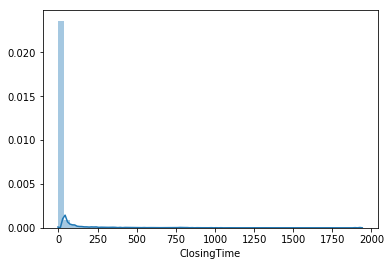

In [11]:
sns.distplot(small_data.ClosingTime) # trash

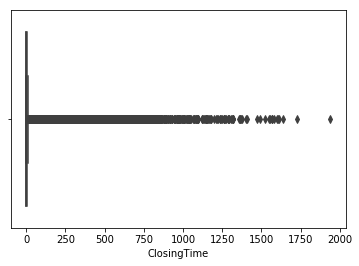

In [13]:
sns.boxplot(x="ClosingTime", data=small_data) # trash also

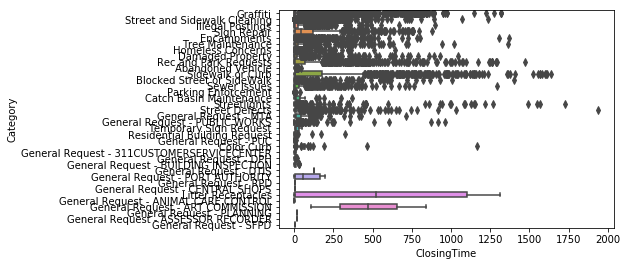

In [16]:
sns.boxplot(x="ClosingTime", y="Category", data=small_data) # not very helpful visually. Too many categories!

In [39]:
# visualizing the top categories only
small_data.groupby("Category").count().sort_values(by=['CaseID'], ascending=False).head(9) # it was observerd that after 10, the numbers dropped

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,ClosingTime
Category,,,,,,,,,,,,,,,,,,,
Street and Sidewalk Cleaning,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750,19750
Graffiti,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480,13480
Encampments,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556,5556
Abandoned Vehicle,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351,2351
Homeless Concerns,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983
Illegal Postings,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
Rec and Park Requests,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178,1178
Parking Enforcement,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155,1155
Sidewalk or Curb,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051,1051


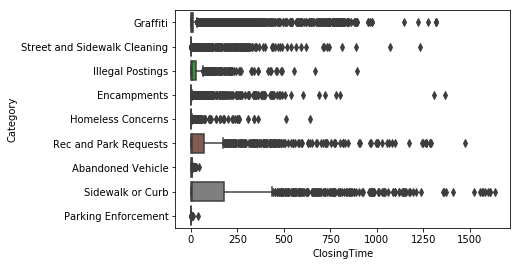

In [40]:
top_categories = ["Street and Sidewalk Cleaning", "Graffiti", "Encampments",
                 "Abandoned Vehicle", "Homeless Concerns", "Illegal Postings",
                  "Rec and Park Requests", "Parking Enforcement", "Parking Enforcement",
                  "Sidewalk or Curb"]

top_small_data = small_data[small_data["Category"].isin(top_categories, )]

sns.boxplot(x="ClosingTime", y="Category", data=top_small_data)

# the boxplot is still bad. Thus, we turn to statistical methods

# Outlier Detection 2: Statistical Methods

In [71]:
z = np.abs(stats.zscore(small_data['ClosingTime'])) # gives us the z-score for each closing time
threshold = 3 # standard deviations

data_reduced = small_data[(z < threshold)] # 
outliers = small_data[(z >= threshold)]

print("Within 3 s.d's       : {}".format(len(data_reduced)))
print("Greather than 3 s.d's: {}".format(len(outliers)))
print("Total                : {}".format(len(small_data)))

# Thus, we've now removed 977 rows of outlier data
# Success!

Within 3 s.d's       : 52980
Greather than 3 s.d's: 977
Total                : 53957


# Plotting, again

/home/louiselai88gmail/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/louiselai88gmail/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


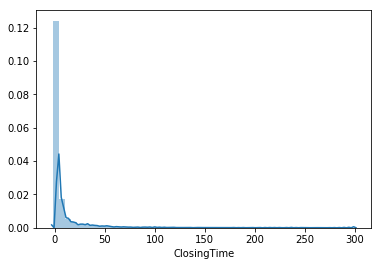

In [72]:
# After successfully removing outliers, we plot again
sns.distplot(data_reduced.ClosingTime) 

# .. well. We see that there is simply a huge concentration around 
# zero days for closing time. We have to live with this for now.

# Prediction, finally

In [76]:
from sklearn.model_selection import train_test_split

In [ ]:
# first, let us try without outlier removal

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
from sklearn.metrics import accuracy_score
y_pred_2 = clf_2.predict(X_test)
accuracy_score(y_test,y_pred_2)

0.45518364596203525